In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [15]:
data = pd.read_csv("diabetes.csv")

X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#лог регрессия
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

#решающее дерево 
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Логистическая регрессия:\n", classification_report(y_test, y_pred_log))
print("Решающее дерево:\n", classification_report(y_test, y_pred_tree))

Логистическая регрессия:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Решающее дерево:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



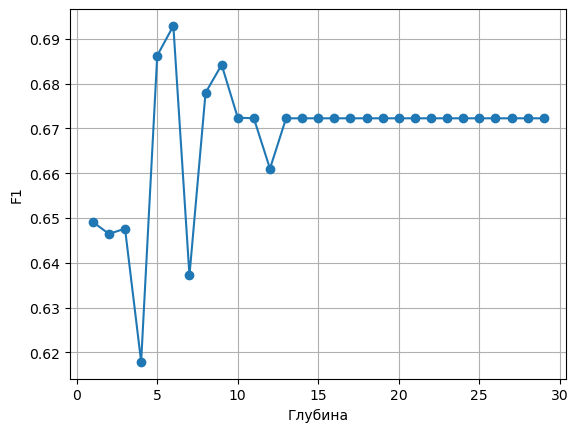

In [25]:
#рассмотрим разную грубину 

depths = range(1, 30)
f1_scores = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))

plt.plot(depths, f1_scores, marker='o')
plt.xlabel("Глубина")
plt.ylabel("F1")
plt.grid()
plt.show()

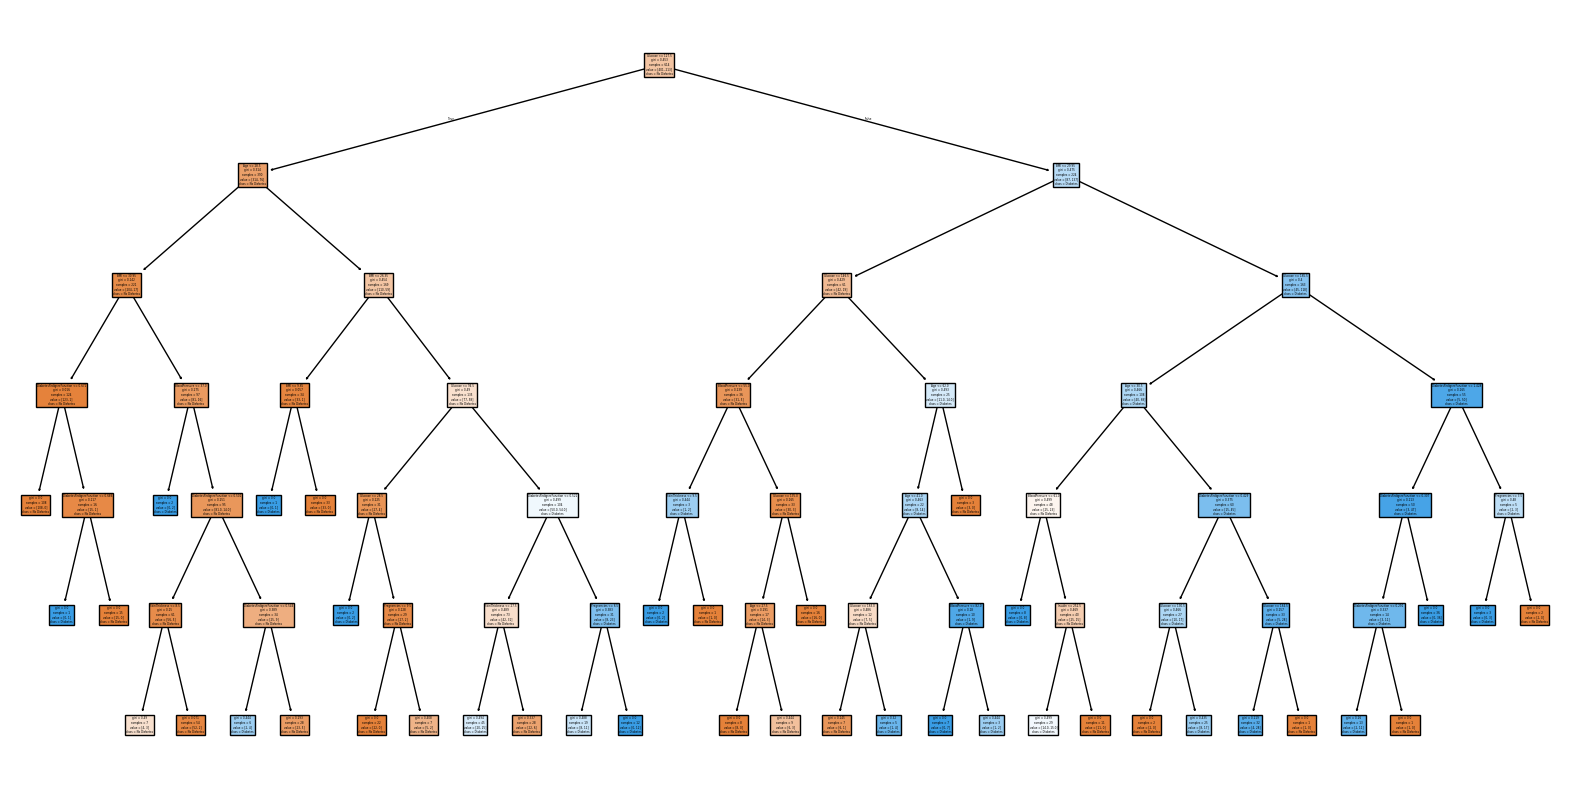

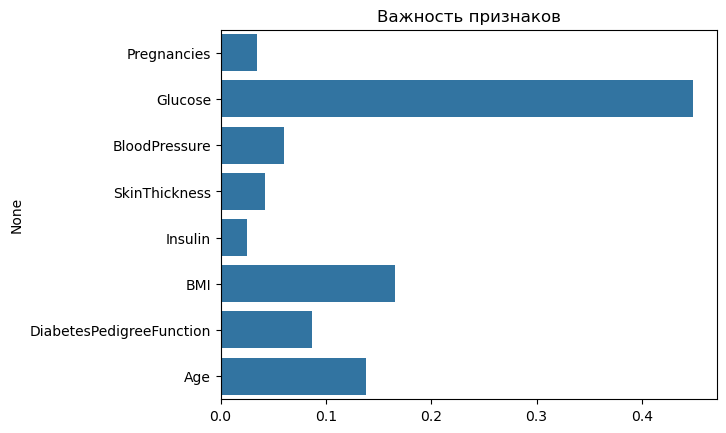

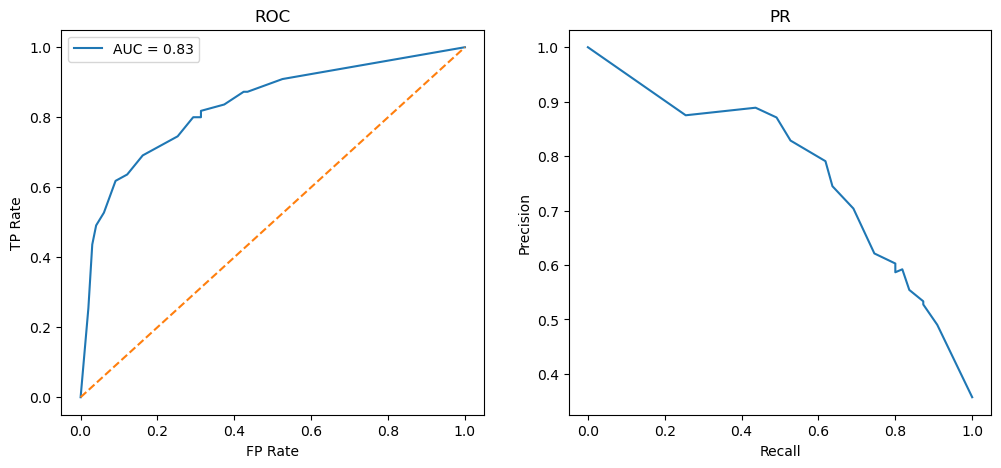

In [23]:
best_depth = f1_scores.index(max(f1_scores))
model = DecisionTreeClassifier(max_depth=best_depth+1, random_state=0)
model.fit(X_train, y_train)

plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"])
plt.show()

importances = model.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Важность признаков")
plt.show()

y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}")
plt.plot([0,1],[0,1], '--')
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.title("ROC")
plt.legend()

plt.subplot(1,2,2)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR")
plt.show()